# *Bankers in the Ivory Tower*

### By Charlie Eaton

### Figure 2.1 Shares of Forbes 400 billionaires with top thirty private university BAs

In [1]:
ssc install statplot

checking statplot consistency and verifying not already installed...
all files already exist and are up to date.


In [2]:
use data/d2_1_bankers_forbes_400_degrees, clear
replace financedetail="non-financial" if financedetail==" non-financial"
gen nonfin=(financedetail=="non-financial" & technology!=1)



(646 real changes made)



In [3]:
local pehedge "private equity & hedge"
local otherfin "other finance"
local technology "technology"
local nonfin "other"
quietly foreach var in pehedge otherfin nonfin technology {
gen top30bapriv`var'=(collegeschooltype==3)*100 if `var'==1
    label var top30bapriv`var' "``var''"
}

In [4]:
foreach control in priv {
foreach degree in ba {
foreach year in 1989 2003 2017 {
statplot top30`degree'`control'nonfin top30`degree'`control'tech ///
top30`degree'`control'otherfin top30`degree'`control'pehedge ///
if year==`year', name(top30`degree'`control'`year', replace) blabel(bar, format(%9.1f)) ///
ytitle("% with a top 30 `degree'") title(`year') ylabel(0(25)75) scheme(plotplain)
}
}
}

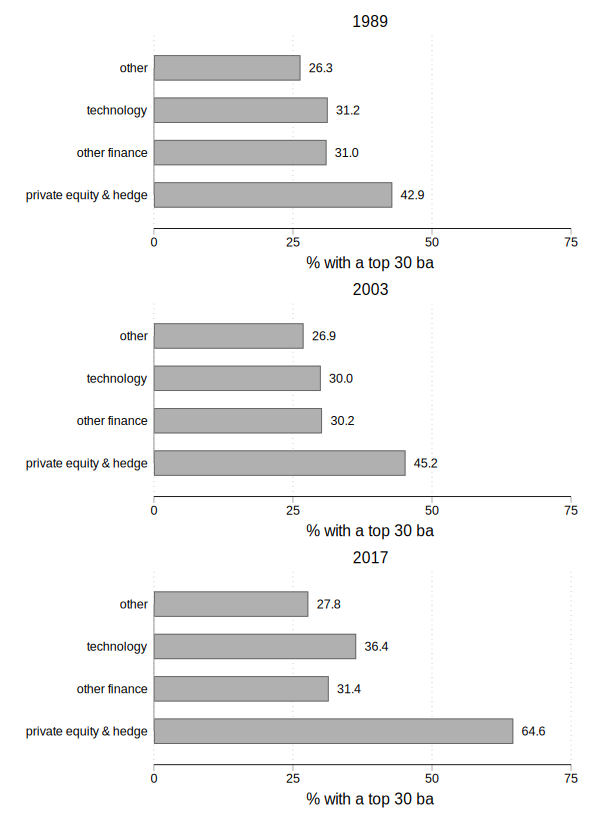




file figures/f2_1_bankers_forbes_degrees.pdf saved as PDF format


In [5]:
graph combine top30bapriv1989 top30bapriv2003 top30bapriv2017 ///
, xsize(6.5) ysize(9) scheme(plotplain) imargins(zero) name(Forbes400privatedegrees, replace) ///
 col(1) 
graph export figures/f2_1_bankers_forbes_degrees.pdf, replace